**The Fringes of Fitness - 2020 Open Scores**

M.K. - Project - BrainStation 

**EDA, data-wrangling steps:**

-	load packages,
-	load data,
-	check if all the columns we expect to see are present,
-	remove NaNs,
-	verify data types, 
-	check for duplicates,
-	visualize the findings,
-	save and create a .csv file for further processing.
    
**Specific checks:**
    
- 'height' from 1.20 to 2.50, 
- 'weight' - non-negative, all weight is measured in kgs,  
- 'gender' – no missing gender parameters,
- homogeneous data in each columns.  


In [1]:
# packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import re


We will work from the Google Drive - if you work from the local machine, you may want to adjust the below commands to let the datasets load from your local drive.

In [2]:
# mount google drive and load data 

from google.colab import drive
drive.mount('/content/drive')

df_2020_opens_athletes = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2020_opens_athletes.csv")
df_2020_opens_scores = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2020_opens_athletes.csv")

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA and Data Wrangling

In [3]:
# make a reserve copy

df_2020_opens_athletes_new = df_2020_opens_athletes.copy()

Visually inspect the data. 

In [4]:
df_2020_opens_athletes

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,9184,Janet Black,Janet,Black,NaN,F,2886e-P9184_12-184.jpg,US,United States,4,16766,CrossFit Trison,46,1.63,66.68,1,29,0,Women (45-49)
1,12348,Karen McCadam,Karen,McCadam,NaN,F,74335-P12348_6-184.jpg,US,United States,4,17779,CrossFit Viento,45,1.68,66.68,2,33,0,Women (45-49)
2,288661,Christine Tensley,Christine,Tensley,NaN,F,cb7b3-P288661_1-184.jpg,US,United States,4,1483,Flower City CrossFit,45,1.65,64.41,3,48,0,Women (45-49)
3,37629,Heather Wood,Heather,Wood,NaN,F,7b3f4-P37629_3-184.jpg,CA,Canada,4,3240,CrossFit Quispamsis,45,1.57,57.61,4,50,0,Women (45-49)
4,50423,Jennifer Dieter,Jennifer,Dieter,NaN,F,5ceb5-P50423_10-184.jpg,US,United States,4,9506,Crucible CrossFit,46,1.57,61.23,5,53,0,Women (45-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393530,1655776,Jeff Russell,Jeff,Russell,NaN,M,pukie.png,US,United States,3,3732,CrossFit Addison,49,NaN,NaN,1792,7272,1,Men (45-49)
393531,341314,Manfred Zotter,Manfred,Zotter,NaN,M,pukie.png,AT,Austria,3,11092,CrossFit Medis,46,NaN,NaN,1794,7281,1,Men (45-49)
393532,231193,Jeffery Jackson,Jeffery,Jackson,NaN,M,4f5f8-P231193_1-184.jpg,US,United States,3,4638,Ft. Wright CrossFit,46,1.83,131.54,1795,7282,1,Men (45-49)
393533,594055,Hector Garza,Hector,Garza,NaN,M,51d43-P594055_1-184.jpg,US,United States,3,9557,King William District CrossFit,48,1.52,145.15,1796,7285,1,Men (45-49)


Let's check for duplicated values - none!

In [5]:
# show a sum of duplicated values 

df_2020_opens_athletes.duplicated(keep=False).sum()

0

The below schema will be used to ensure that all the columns that we expect to have are indeed present.

In [6]:
# expected schema 

schema_exp_2020_opens_athletes = {'height': float, 'affiliateid': np.int64,
             'countryoforiginname': object,
             'weight': float,
             'affiliatename': object,
              'divisionid':  np.int64,
             'postcompstatus' : object,
             'profilepics3key': object,
             'competitorid': np.int64,
             'firstname': object,
             'gender': object,
              'is_scaled': np.int64,
             'lastname': object,
             'age': np.int64,
             'countryoforigincode': object,
             'competitorname': object,
             'overallrank': np.int64,
             'overallscore': np.int64,
             'division': object}

Create a function to run the check of the schema.

In [7]:
# check columns

def schema_checker(df_2020_opens_athletes, schema_exp_2020_opens_athletes):
    for i in schema_exp_2020_opens_athletes:
        if i not in df_2020_opens_athletes.columns:
            print(f'"{i}" not found in dataset.')
            
        else:
            print(f'"{i}" is found.')


Print the result of the check and see if any discrepancies are discovered. 

In [8]:
print(schema_checker(df_2020_opens_athletes, schema_exp_2020_opens_athletes))

"height" is found.
"affiliateid" is found.
"countryoforiginname" is found.
"weight" is found.
"affiliatename" is found.
"divisionid" is found.
"postcompstatus" is found.
"profilepics3key" is found.
"competitorid" is found.
"firstname" is found.
"gender" is found.
"is_scaled" is found.
"lastname" is found.
"age" is found.
"countryoforigincode" is found.
"competitorname" is found.
"overallrank" is found.
"overallscore" is found.
"division" is found.
None


All the items of the schema are present.

Below, check if the info of the dataset. From the below, we see that there are major issues with the missing values in certain columns, i.e., 'postcompstatus'.


In [9]:
df_2020_opens_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393535 entries, 0 to 393534
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   competitorid         393535 non-null  int64  
 1   competitorname       393535 non-null  object 
 2   firstname            393535 non-null  object 
 3   lastname             393535 non-null  object 
 4   postcompstatus       313 non-null     object 
 5   gender               393535 non-null  object 
 6   profilepics3key      393535 non-null  object 
 7   countryoforigincode  393295 non-null  object 
 8   countryoforiginname  393535 non-null  object 
 9   divisionid           393535 non-null  int64  
 10  affiliateid          393535 non-null  int64  
 11  affiliatename        371541 non-null  object 
 12  age                  393535 non-null  int64  
 13  height               212062 non-null  float64
 14  weight               221542 non-null  float64
 15  overallrank      

Create a visual to check for the missing values - they are present in 4 columns, which include 'postcompstatus', 'affiliatename', 'height' and 'weight'.

Let's create a function to check the data types.

In [10]:
# checker of data types in columns

def dtype_checker(df_2020_opens_athletes, schema_exp_2020_opens_athletes):
    for column,dtype in schema_exp_2020_opens_athletes.items():
        if column in df_2020_opens_athletes.columns:
            if df_2020_opens_athletes[column].dtype != dtype:
                print(f'"{column}" does not match dtype "{dtype}"')
           # column doesn't match the expected data type
            else:
                print(f'{column} matches the expected data type.')

Let's run the function.

In [11]:
# all data types match our expectation

dtype_checker(df_2020_opens_athletes, schema_exp_2020_opens_athletes)

height matches the expected data type.
affiliateid matches the expected data type.
countryoforiginname matches the expected data type.
weight matches the expected data type.
affiliatename matches the expected data type.
divisionid matches the expected data type.
postcompstatus matches the expected data type.
profilepics3key matches the expected data type.
competitorid matches the expected data type.
firstname matches the expected data type.
gender matches the expected data type.
is_scaled matches the expected data type.
lastname matches the expected data type.
age matches the expected data type.
countryoforigincode matches the expected data type.
competitorname matches the expected data type.
overallrank matches the expected data type.
overallscore matches the expected data type.
division matches the expected data type.


Run the newly created data-type checker function - all data types match our expectations set in the schema above.

Let's run the below command to 'change' the data types (for the same data-types), which will allow us to uncover any columns that contain data with data that doesn't actually match the data-type we expect (what the data type checker may not have captured). We do that because we had initially issues with loading the data because of the potential data type discrepancies. 

In [12]:
# let's change the data types 

df_2020_opens_athletes['height'] = pd.Series(df_2020_opens_athletes['height'], dtype="float") 
df_2020_opens_athletes['affiliateid'] = pd.Series(df_2020_opens_athletes['affiliateid'], dtype="int64") 
df_2020_opens_athletes['weight'] = pd.Series(df_2020_opens_athletes['weight'], dtype="float")
df_2020_opens_athletes['divisionid'] = pd.Series(df_2020_opens_athletes['divisionid'], dtype="int64")
df_2020_opens_athletes['competitorid'] = pd.Series(df_2020_opens_athletes['competitorid'], dtype="int64")
df_2020_opens_athletes['is_scaled'] = pd.Series(df_2020_opens_athletes['is_scaled'], dtype="int64")
df_2020_opens_athletes['age'] = pd.Series(df_2020_opens_athletes['age'], dtype="int64")
df_2020_opens_athletes['overallrank'] = pd.Series(df_2020_opens_athletes['overallrank'], dtype="int64")
df_2020_opens_athletes['overallscore'] = pd.Series(df_2020_opens_athletes['overallscore'], dtype="int64")

Let's check the data type checker to make sure that we have all the right data types in place.

In [13]:
# all data types match our expectation

dtype_checker(df_2020_opens_athletes, schema_exp_2020_opens_athletes)

height matches the expected data type.
affiliateid matches the expected data type.
countryoforiginname matches the expected data type.
weight matches the expected data type.
affiliatename matches the expected data type.
divisionid matches the expected data type.
postcompstatus matches the expected data type.
profilepics3key matches the expected data type.
competitorid matches the expected data type.
firstname matches the expected data type.
gender matches the expected data type.
is_scaled matches the expected data type.
lastname matches the expected data type.
age matches the expected data type.
countryoforigincode matches the expected data type.
competitorname matches the expected data type.
overallrank matches the expected data type.
overallscore matches the expected data type.
division matches the expected data type.


Create a visual to check for the missing values - they are present in 4 columns, which include 'postcompstatus', 'affiliatename', 'height' and 'weight'.

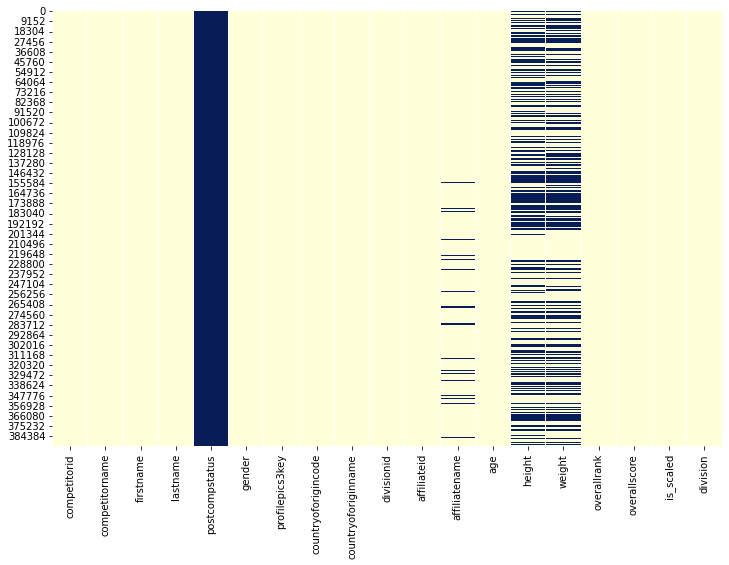

In [14]:
# plot the missing data points 

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_2020_opens_athletes.isnull(), cbar=False, cmap = 'YlGnBu')
plt.show() # missing data in postcompstatus, affiliatename, height, weight 

Let's create a function that formally checks for NaNs in the data set.

In [15]:
# check nans

def nan_checker(df_2020_opens_athletes): 

    summary = {}
    # are there any nan values?
    any_nans = df_2020_opens_athletes.isna().any().any()
    
    summary['NaNs Exist'] = any_nans
    
    # how many?
    n_nans = df_2020_opens_athletes.isna().sum().sum()
    summary['NaN Count'] = n_nans
    
    # which variables do they come from
    nan_column_series = df_2020_opens_athletes.isna().sum()
    nan_column_names = list(nan_column_series[nan_column_series > 0].index)
    
    summary['NaN Containing Columns'] = nan_column_names
    
    
    # any variables with more than 50% of data missing?
    nan_column_percent = 100 * nan_column_series/df_2020_opens_athletes.shape[0]
    nan_columns_with_more_than_50_pct = list(nan_column_percent[nan_column_percent > 50].index)
    
    summary['NaNs More Than 50%'] = nan_columns_with_more_than_50_pct
    
    #summary can be all the info about nans
    return(summary)

Print out the name of the columns in which the NaNs are present and count their numbers.

In [16]:
# show nans stats

print(nan_checker(df_2020_opens_athletes)) # same picture as revealed by the heatmap above

{'NaNs Exist': True, 'NaN Count': 768922, 'NaN Containing Columns': ['postcompstatus', 'countryoforigincode', 'affiliatename', 'height', 'weight'], 'NaNs More Than 50%': ['postcompstatus']}


Examine the missing 'affiliateid' values.

In [17]:
# missing 'affiliateid' - show rows 

print(df_2020_opens_athletes[df_2020_opens_athletes['affiliatename'].isnull()])

        competitorid   competitorname  ... is_scaled       division
81            579031   Stella Bartram  ...         0  Women (45-49)
101           128418  Bronwyn Clacher  ...         0  Women (45-49)
110           950022       Gemma Riba  ...         0  Women (45-49)
118            57100  Claudine Nadeau  ...         0  Women (45-49)
174            79926     Lisa Mendoza  ...         0  Women (45-49)
...              ...              ...  ...       ...            ...
393481       1812322   David Williams  ...         1    Men (45-49)
393488        887096   Jonathan Worth  ...         1    Men (45-49)
393492       1820745         Jack Gin  ...         1    Men (45-49)
393517       1756822       Jay Madaus  ...         1    Men (45-49)
393534       1781603     Martin Field  ...         1    Men (45-49)

[21994 rows x 19 columns]


Fill in the missing 'affiliatename' with zeros from 'affiliateid'. It will help us to later replace the zeros with 'None'.

At this point, we should see if there are affiliateids that are equal to zero - we see them.

In [18]:
# let's see how many None values will be there 

df_2020_opens_athletes[df_2020_opens_athletes['affiliateid']==0]

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
81,579031,Stella Bartram,Stella,Bartram,NaN,F,21905-P579031_3-184.jpg,GB,United Kingdom,4,0,NaN,47,1.63,63.00,82,651,0,Women (45-49)
101,128418,Bronwyn Clacher,Bronwyn,Clacher,NaN,F,eafa9-P128418_6-184.jpg,AU,Australia,4,0,NaN,46,1.75,77.11,102,806,0,Women (45-49)
110,950022,Gemma Riba,Gemma,Riba,NaN,F,8fbe5-P950022_2-184.jpg,ES,Spain,4,0,NaN,45,NaN,NaN,111,859,0,Women (45-49)
118,57100,Claudine Nadeau,Claudine,Nadeau,NaN,F,c4980-P57100_3-184.jpg,US,United States,4,0,NaN,47,1.68,65.77,119,889,0,Women (45-49)
174,79926,Lisa Mendoza,Lisa,Mendoza,NaN,F,a9d43-P79926_8-184.jpg,US,United States,4,0,NaN,47,1.60,61.69,175,1295,0,Women (45-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393481,1812322,David Williams,David,Williams,NaN,M,pukie.png,US,United States,3,0,NaN,45,NaN,NaN,1744,7098,1,Men (45-49)
393488,887096,Jonathan Worth,Jonathan,Worth,NaN,M,e1f17-P887096_3-184.jpg,GB,United Kingdom,3,0,NaN,48,NaN,NaN,1751,7116,1,Men (45-49)
393492,1820745,Jack Gin,Jack,Gin,NaN,M,pukie.png,US,United States,3,0,NaN,48,1.80,74.84,1755,7127,1,Men (45-49)
393517,1756822,Jay Madaus,Jay,Madaus,NaN,M,e0871-P1756822_1-184.jpg,US,United States,3,0,NaN,48,NaN,NaN,1777,7223,1,Men (45-49)


Fill in the missing values in affiliatename with affiliateid. 

In [19]:
# fillinf affiliate name with zeros (0) from affiliate id

df_2020_opens_athletes['affiliatename'].fillna(df_2020_opens_athletes['affiliateid'], inplace=True)

Ensure that the affiliate names and the affiliate ids are missing at the same time. The below shows that they are.

In [20]:
# the number of NaNs is the same as the number of 0 in affiliate IDs. We conclude they miss at the same time.

missing_affiliatename_affiliateid = df_2020_opens_athletes[df_2020_opens_athletes['affiliatename']==df_2020_opens_athletes['affiliateid']]
result_missing_affiliatename_affiliateid = missing_affiliatename_affiliateid[['affiliatename','affiliateid']].isnull().count()
print(result_missing_affiliatename_affiliateid) # all missing names replaced with 0

affiliatename    21994
affiliateid      21994
dtype: int64


Replace the zeros with 'None' for the consistency of data types.

In [21]:
#replace all 0 with 'None' for naming consistency

df_2020_opens_athletes['affiliatename'] = df_2020_opens_athletes['affiliatename'].replace({0: "None"})

Count the number of 'None'.

In [22]:
# count the 'None'

(df_2020_opens_athletes['affiliatename'] == "None").sum() # matches the above figure

21994

Check that all the zeros were replaced - they have.

In [23]:
# affiliate name is dealt with 

df_2020_opens_athletes['affiliatename'].isnull().sum() # no missing affiliate names remain

0

Run the nan_checker to see what missing values remain - ['postcompstatus', 'countryoforigincode', 'height', 'weight'].

In [24]:
# check for remaining missing values 

print(nan_checker(df_2020_opens_athletes)) # missing values remain in 'postcompstatus', 'countryoforigincode', 'height', 'weight'

{'NaNs Exist': True, 'NaN Count': 746928, 'NaN Containing Columns': ['postcompstatus', 'countryoforigincode', 'height', 'weight'], 'NaNs More Than 50%': ['postcompstatus']}


Deal with the missing country of origin code: we will drop them country of origin code column because we don't need it for our purposes.

In [25]:
# missing the country of origin - let's drop this column altogether

df_2020_opens_athletes = df_2020_opens_athletes.drop(columns = 'countryoforigincode', axis = 1)

Check the remaining missing values: ['postcompstatus', 'height', 'weight'].

In [26]:
print(nan_checker(df_2020_opens_athletes))

{'NaNs Exist': True, 'NaN Count': 746688, 'NaN Containing Columns': ['postcompstatus', 'height', 'weight'], 'NaNs More Than 50%': ['postcompstatus']}


Dealing with the 'postcompstatus'. There are [nan, 'accepted', 'invited', 'declined'] unique values. 

In [27]:
df_2020_opens_athletes['postcompstatus'].unique()

array([nan, 'accepted', 'invited', 'declined'], dtype=object)

Check the postcopmpstatus. Based on the above, we change NaNs to 'not accepted' and 'invited' to 'not accepted' and 'declined' to 'not accepted'. Obviously, those athletes who 'declined' the invite didn't particiapte in the games.

In [28]:
# run a replacement function to correct for the statuses - declined to not accepted and invited to not accepted.

df_2020_opens_athletes['postcompstatus'] = df_2020_opens_athletes['postcompstatus'].replace({'declined': 'not accepted', 'invited': 'not accepted'})


Fill the rest of the missing values with 'not accepted' now that we know that the 'accepted' ones have been correctly identified and marked.

In [29]:
df_2020_opens_athletes['postcompstatus'] = df_2020_opens_athletes['postcompstatus'].fillna('not accepted')

Check the remaining missing values - 'height', 'weight' and no other.

In [30]:
print(nan_checker(df_2020_opens_athletes)) # after the above manipulations, the only missing values are in 'height', 'weight'. 

{'NaNs Exist': True, 'NaN Count': 353466, 'NaN Containing Columns': ['height', 'weight'], 'NaNs More Than 50%': []}


To complete the height and weight columns, let's use the median values for the athletes who participated in the games. For height, we should replace the nonsensical height values with medians that are reasonable for fit humans. Empirically, we've discovered that fit humans shorter than 1.3 aren't frequent, and those who are taller than 2.1 are also not frequent, so we will replace those extreme values with median values. 

In [31]:
# covnert data types for 'height' and 'weight' to float.

# let's replace non-sensical heights with NaNs

df_2020_opens_athletes.loc[(df_2020_opens_athletes['height'] < 1.3), ['height']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['height'] < 1.3), ['height']].fillna(np.nan, inplace = True)
df_2020_opens_athletes.loc[(df_2020_opens_athletes['height'] > 2.1), ['height']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['height'] > 2.1), ['height']].fillna(np.nan, inplace = True)

In [32]:
for_mean_df = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2020_opens_athletes.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the median from the initial file for 2019 games (because we know there aren't a large amount of missing values) and run functions to replace the missing values with the median value.

In [33]:
height_median_men = for_mean_df[for_mean_df['gender'] == 'M']['height'].median()

In [34]:
height_median_women = for_mean_df[for_mean_df['gender'] == 'F']['height'].median()

In [35]:
weight_median_men = for_mean_df[for_mean_df['gender'] == 'M']['weight'].median()

In [36]:
weight_median_women = for_mean_df[for_mean_df['gender'] == 'F']['weight'].median()

In [37]:
df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'F'), ['weight']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'F'), ['weight']].fillna(weight_median_women)

In [38]:
df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'M'), ['weight']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'M'), ['weight']].fillna(weight_median_men)

In [39]:
df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'F'), ['height']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'F'), ['height']].fillna(height_median_women)

In [40]:
df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'M'), ['height']] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['gender'] == 'M'), ['height']].fillna(height_median_men)

After the above commands replace all the missing values - we will check them again using the nan_checker - no missing values left.

In [41]:
print(nan_checker(df_2020_opens_athletes))

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


Now, we removed all the NaNs. We will pass to verifying the data types.

In [42]:
# data types 

df_2020_opens_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393535 entries, 0 to 393534
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   competitorid         393535 non-null  int64  
 1   competitorname       393535 non-null  object 
 2   firstname            393535 non-null  object 
 3   lastname             393535 non-null  object 
 4   postcompstatus       393535 non-null  object 
 5   gender               393535 non-null  object 
 6   profilepics3key      393535 non-null  object 
 7   countryoforiginname  393535 non-null  object 
 8   divisionid           393535 non-null  int64  
 9   affiliateid          393535 non-null  int64  
 10  affiliatename        393535 non-null  object 
 11  age                  393535 non-null  int64  
 12  height               393535 non-null  float64
 13  weight               393535 non-null  float64
 14  overallrank          393535 non-null  int64  
 15  overallscore     

Let's examine how the data frame looks like now. 

In [43]:
# check the df

df_2020_opens_athletes

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,9184,Janet Black,Janet,Black,not accepted,F,2886e-P9184_12-184.jpg,United States,4,16766,CrossFit Trison,46,1.63,66.68,1,29,0,Women (45-49)
1,12348,Karen McCadam,Karen,McCadam,not accepted,F,74335-P12348_6-184.jpg,United States,4,17779,CrossFit Viento,45,1.68,66.68,2,33,0,Women (45-49)
2,288661,Christine Tensley,Christine,Tensley,not accepted,F,cb7b3-P288661_1-184.jpg,United States,4,1483,Flower City CrossFit,45,1.65,64.41,3,48,0,Women (45-49)
3,37629,Heather Wood,Heather,Wood,not accepted,F,7b3f4-P37629_3-184.jpg,Canada,4,3240,CrossFit Quispamsis,45,1.57,57.61,4,50,0,Women (45-49)
4,50423,Jennifer Dieter,Jennifer,Dieter,not accepted,F,5ceb5-P50423_10-184.jpg,United States,4,9506,Crucible CrossFit,46,1.57,61.23,5,53,0,Women (45-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393530,1655776,Jeff Russell,Jeff,Russell,not accepted,M,pukie.png,United States,3,3732,CrossFit Addison,49,1.78,83.91,1792,7272,1,Men (45-49)
393531,341314,Manfred Zotter,Manfred,Zotter,not accepted,M,pukie.png,Austria,3,11092,CrossFit Medis,46,1.78,83.91,1794,7281,1,Men (45-49)
393532,231193,Jeffery Jackson,Jeffery,Jackson,not accepted,M,4f5f8-P231193_1-184.jpg,United States,3,4638,Ft. Wright CrossFit,46,1.83,131.54,1795,7282,1,Men (45-49)
393533,594055,Hector Garza,Hector,Garza,not accepted,M,51d43-P594055_1-184.jpg,United States,3,9557,King William District CrossFit,48,1.52,145.15,1796,7285,1,Men (45-49)


Check if there any negative values for in the weight column - none.

In [44]:
# check weight - non-negative 

if df_2020_opens_athletes['weight'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")
    

TRUE


Check if there are nay negative height values - none.

In [45]:
# check height - non-negative 

if df_2020_opens_athletes['height'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")
    

TRUE


Check if there are any negative age values - none.

In [46]:
# check age - non-negative 

if df_2020_opens_athletes['age'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")

TRUE


Check if there are any height values that are outside the reasonable range for a fit athlete. 

In [47]:
# now, the height is in the range of 1.3 to 2.1 - perfect! none is outside of the range [1.3;2.1]

((df_2020_opens_athletes['height'].values < 1.3).any() or (df_2020_opens_athletes['height'].values > 2.1).any())

False

Check the remaining NaNs - none.

In [48]:
print(nan_checker(df_2020_opens_athletes)) # all nans fixed

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


## Normalization of weight, height and age.

Let's observe the distribution of height for men and women - no abnormalities discovered after we've performed correction for those values.

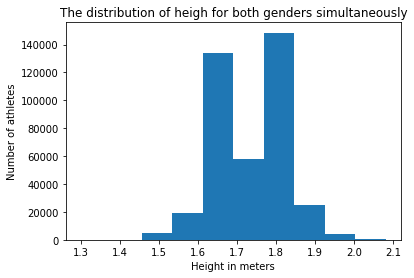

In [49]:
# height distribution - men and women 

plt.figure()
plt.hist(df_2020_opens_athletes.height)
plt.title('The distribution of heigh for both genders simultaneously')
plt.ylabel('Number of athletes')
plt.xlabel('Height in meters')
plt.show()

Let's examine the distribution of age for both men and women - no abnormalities detected after we've performed the normalization.

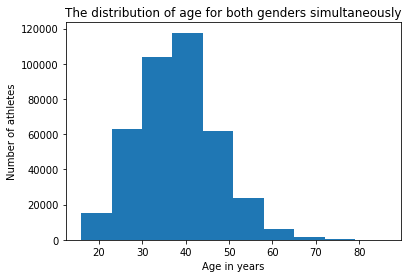

In [50]:
# age normalization - men and women 

plt.figure()
plt.hist(df_2020_opens_athletes.age)
plt.title('The distribution of age for both genders simultaneously')
plt.ylabel('Number of athletes')
plt.xlabel('Age in years')
plt.show()

Let's see how age is distributed after 60. It shows us that after the age of 80, the number of people in older categories becomes smaller or even nonsensical.

In [51]:
# let's see how age is distributed after 60

df_2020_opens_athletes.loc[(df_2020_opens_athletes['age'] > 60,['age'])].value_counts().sort_values(ascending=False)

# it shows us that after the age of 80, the number of people in older categories becomes smaller or even non-sensical


age
61     868
62     664
63     597
64     494
65     359
66     299
68     232
67     223
69     142
70     125
71      98
72      82
73      69
74      48
75      41
76      29
77      16
78      13
79      10
81       8
80       5
82       3
83       3
86       2
dtype: int64

It is nonsensical to believe that there are athletes who participate in the opens at the age of 80+. That's why we will force the cap to be at 80 years old. Although we believe some athletes might be older than that, but their number is small and it will not impact the outcomes of the models significantly.

In [52]:
# forcing the max age to be capped at 80

df_2020_opens_athletes.loc[(df_2020_opens_athletes['age'] > 80,['age'])] = 80

df_2020_opens_athletes.loc[(df_2020_opens_athletes['age'] > 60,['age'])].value_counts().sort_values(ascending=False)


age
61     868
62     664
63     597
64     494
65     359
66     299
68     232
67     223
69     142
70     125
71      98
72      82
73      69
74      48
75      41
76      29
80      21
77      16
78      13
79      10
dtype: int64

Let's see the normalized age distribution - wonderful!

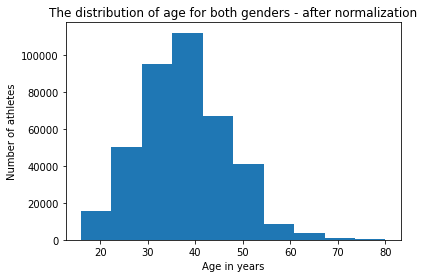

In [53]:
# normalized age

plt.figure()
plt.hist(df_2020_opens_athletes.age)
plt.title('The distribution of age for both genders - after normalization')
plt.ylabel('Number of athletes')
plt.xlabel('Age in years')
plt.show()

Let's check the distribution of weight - the initial plot shows that there are significant problems with the data accuracy in the column.

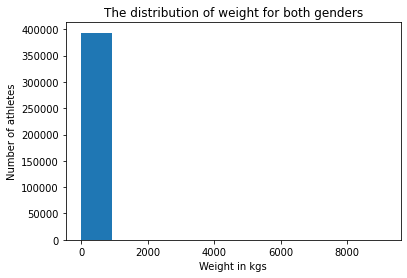

In [54]:
# weight

plt.figure()
plt.hist(df_2020_opens_athletes.weight)
plt.title('The distribution of weight for both genders')
plt.ylabel('Number of athletes')
plt.xlabel('Weight in kgs')
plt.show()

Let's try to sort out nonsensical values, i.e., those that are higher than 110 - because it is hard to imagine a fit athlete participating in the games is he/she is heavier than 110 kg. If the figure is larger - we can imagine that the athlete indicated the weight in pounds. 

In [55]:
#let's see how weight is distributed - manually play with the weights trying to find a threshold of rediculousness

df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 110,['weight'])].value_counts().sort_values(ascending=False)

weight 
113.40     565
111.13     546
115.67     301
117.93     286
120.20     217
          ... 
654.00       1
507.12       1
800.00       1
785.17       1
9151.22      1
Length: 178, dtype: int64

Let's imagine that it is extremely unlikely that anyone heavier than 300 pounds (or kilos) would participate in the opens. Let's replace the higher values with the median weight in kgs respectively for men and women. 

In [56]:
# assuming that people whose weight is more than 300 have made a fat finger error. Correct that to median per gender.

df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 300,['weight'])] = weight_median_men

Assuming that people whose weight is 170 or more have indicated their weight in lbs. Convert that weight to kgs. 

In [57]:
# assuming that people whose weight is 170 or more have indicated their weight in lbs. Convert that weight to kg's

df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 170,['weight'])] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 170,['weight'])] * 0.453592

Analyze the median weights for men and women in the US - to give us a sense of what a median weight of an athlete might be.

In [58]:
# assuming that people whose weight is 140+ and who are F have indicated their weight in lbs. Convert that weight to kg's

#df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 120)].groupby(by='gender').median()

us_weight = df_2020_opens_athletes.groupby(['countryoforiginname', 'gender'])['weight'].mean()
df_us_weight = pd.DataFrame(data=us_weight)

df_us_weight.query("countryoforiginname == 'United States'")

weight
countryoforiginname gender           
United States       F       63.902403
                    M       86.083218

It is clear that most people whose weight is 120+ are from the US and Canada. It indicates that they indicated their weight in lbs. We convert that to kgs.

In [59]:
# most people whose weight is 120+ are from the US and Canada which indicates that they indicated their weight in lbs - we convert that to kgs

df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 120,['weight'])] = df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] > 120,['weight'])] * 0.453592

We continue our analysis of the weight column. To correct the weights - let's convert the weight of women > 90 to the average weight of women in kgs, and the same for men weighing 110+. Clearly, those weights are abnormally high for CrossFit participants - let's assume that their actual weight is equal to the median for their respective gender.

In [60]:
#correcting weights - let's convert the weight of women > 90 to the average weight and the same for men weighin 110+

# max 
df_2020_opens_athletes['weight'] = np.where((df_2020_opens_athletes['weight'] > 90) & (df_2020_opens_athletes['gender'] == 'F'), weight_median_women, df_2020_opens_athletes['weight'])
df_2020_opens_athletes['weight'] = np.where((df_2020_opens_athletes['weight'] > 110) & (df_2020_opens_athletes['gender'] == 'M'), weight_median_men, df_2020_opens_athletes['weight'])



Now that we have regularized the upper distribution of weight, let's address the lower part of the distribution.

Let's examine the minimums. We manually play with the weights trying to find a 'threshold of nonsense'. It looks like there are some ridiculous weights indicated, but we cannot identify which those are.


In [61]:
#let's examine the minimums  - manually play with the weights trying to find a threshold of rediculousness

# looks like there are some rediculous weights indicated, but we cannot identify which those are. 

df_2020_opens_athletes.loc[(df_2020_opens_athletes['weight'] < 50,['weight'])].value_counts().sort_values(ascending=False)

weight
49.90     473
47.63     299
49.00     202
48.00     175
48.99     159
         ... 
7.71        1
8.16        1
33.00       1
4.00        1
9.07        1
Length: 99, dtype: int64

Let's force the weights less than 40 and 50 kg for women and men respectively to medians. It is hard to imagine fit men and women weighing less than that.

In [62]:
# we will force the minimums that are below the reasonable minimums
df_2020_opens_athletes['weight'] = np.where((df_2020_opens_athletes['weight'] < 40) & (df_2020_opens_athletes['gender'] == 'F'), weight_median_women, df_2020_opens_athletes['weight'])
df_2020_opens_athletes['weight'] = np.where((df_2020_opens_athletes['weight'] < 50) & (df_2020_opens_athletes['gender'] == 'M'), weight_median_men, df_2020_opens_athletes['weight'])


Let's examine how the entire distribution of weight has changed now after the above manipulations. We expect it to be from 40 (min weight for women) all up to 110 (the max weight for men) - we've achieved our goal.

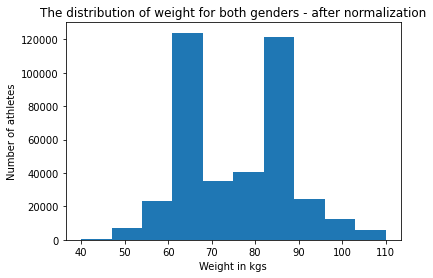

In [63]:
# weight - normalized - this double head indicates the gender specificity, which is a good sign of successful normalization 

plt.figure()
plt.hist(df_2020_opens_athletes.weight)
plt.title('The distribution of weight for both genders - after normalization')
plt.ylabel('Number of athletes')
plt.xlabel('Weight in kgs')
plt.show()

Let's see how many men and women have competed in the opens across all the divisions.

In [64]:
# What to do with athletes who have competed in more than one division?

In [65]:
# check the gender groupings 

gender1 = df_2020_opens_athletes.groupby('gender').count()
gender1

,competitorid,competitorname,firstname,lastname,postcompstatus,profilepics3key,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
gender,,,,,,,,,,,,,,,,,
F,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216,167216
M,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319,226319


We have found out that 42.49% of the participants are recorded as females and 57.51% are males.

In [66]:
F_percent = round(gender1.at['F','height']/(gender1['competitorid'].sum())*100,2)
M_percent = (100 - F_percent)
print(f'{F_percent}% of the participants are recorded as females and {M_percent}% are males.')

42.49% of the participants are recorded as females and 57.51% are males.


## Univariate analysis 

To perform the analysis, let's identify the columns that contain numerical and categorical variables.

In [67]:
# variables 

num_var_2020_opens_athletes = ['height', 'weight', 'age', 'overallscore', 'overallrank', 'divisionid']
cat_var_2020_opens_athletes = [ 'countryoforiginname', 'affiliatename', 'is_scaled', 'division']
other = ['competitorname']

Let's plot categorical variables.

The countries from which most of athletes come are the US, Canada, Brazil, UK, Australia, France, Germany, Spain, Italy and the NL. It seems that CrossFit is quite popular in Europe and North America.


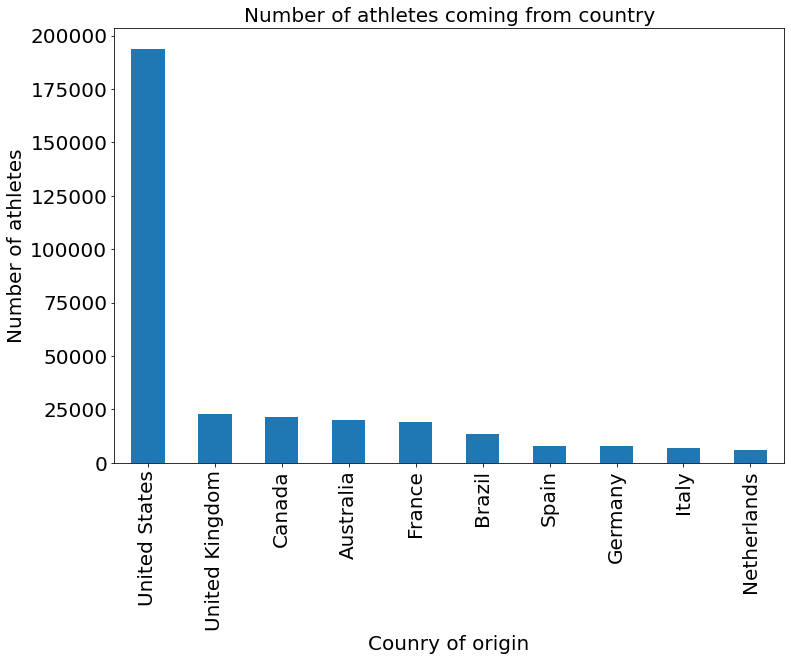

In [68]:
# plot categorical vaiables

#country of origin

countryoforiginname_2020_opens_athletes =df_2020_opens_athletes.groupby('countryoforiginname').competitorname.count()
countryoforiginname_2020_opens_athletes = countryoforiginname_2020_opens_athletes.sort_values(ascending = False)
countryoforiginname_2020_opens_athletes10 = countryoforiginname_2020_opens_athletes.head(10)
countryoforiginname_2020_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Counry of origin", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes coming from country", fontsize=20);



Let's analyze the distribution of affiliate gyms. It seems that most of participants don't represent any official affiliate, but many actually train at affiliated gyms. 

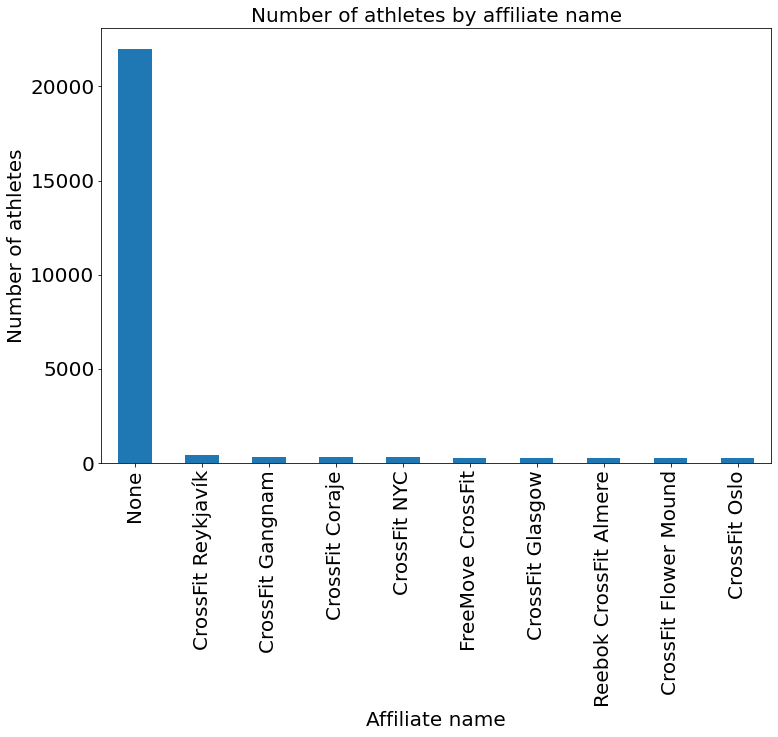

In [69]:
# split by affiliate 

affiliatename_2020_opens_athletes = df_2020_opens_athletes.groupby('affiliatename').division.count()

affiliatename_2020_opens_athletes = affiliatename_2020_opens_athletes.sort_values(ascending = False)
affiliatename_2020_opens_athletes10 = affiliatename_2020_opens_athletes.head(10)
affiliatename_2020_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Affiliate name", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by affiliate name", fontsize=20);


Let's analyze how many athletes competed in scaled (status 1) and non_scaled opens (status 0). It is clear that the majority of athletes do a non-scaled training (status 0). It is worth mentioning that only those who do a non-scaled training (status 0) can qualify for the games.

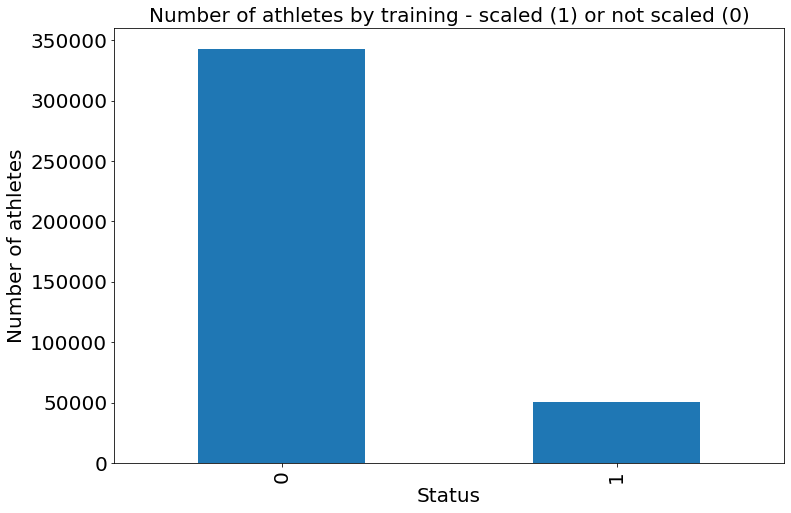

In [70]:
# split by 'is_scaled' 

status_2020_opens_athletes = df_2020_opens_athletes.groupby('is_scaled').competitorname.count()

status_2020_opens_athletes = status_2020_opens_athletes.sort_values(ascending = False)
status_2020_opens_athletes10 = status_2020_opens_athletes.head(10)
status_2020_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Status", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by training - scaled (1) or not scaled (0)", fontsize=20);

Let's see the distribution of athletes by division. The majority compete in the divisions 'men' and 'women'. We are interested in exploring these further. 

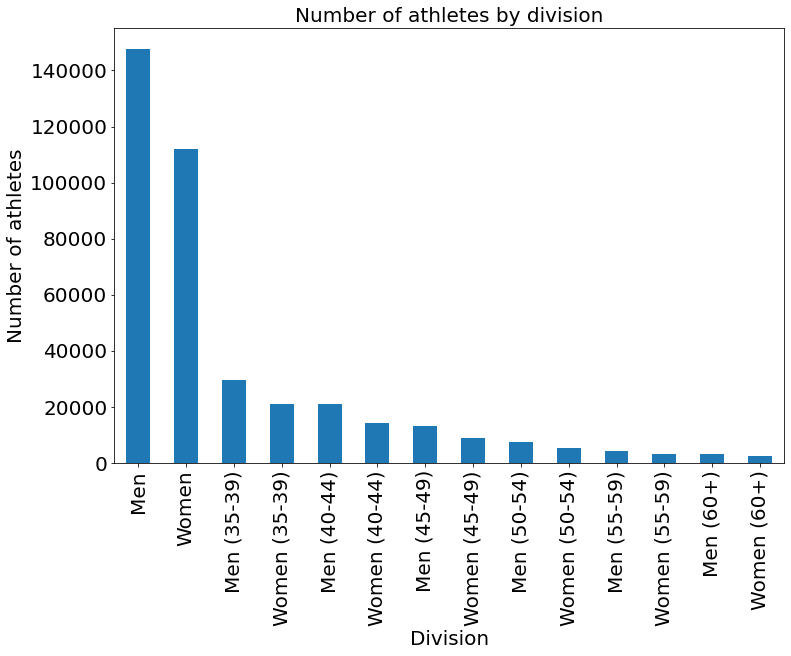

In [71]:
# split by affiliate 

division_2020_opens_athletes = df_2020_opens_athletes.groupby('division').competitorname.count()

division_2020_opens_athletes = division_2020_opens_athletes.sort_values(ascending = False)
division_2020_opens_athletes.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Division", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by division", fontsize=20);

Let's look at the distribution of height by gender - the median for women seems to be ~ 1.7 m while the average for men is closer to 1.8 m (across all divisions).

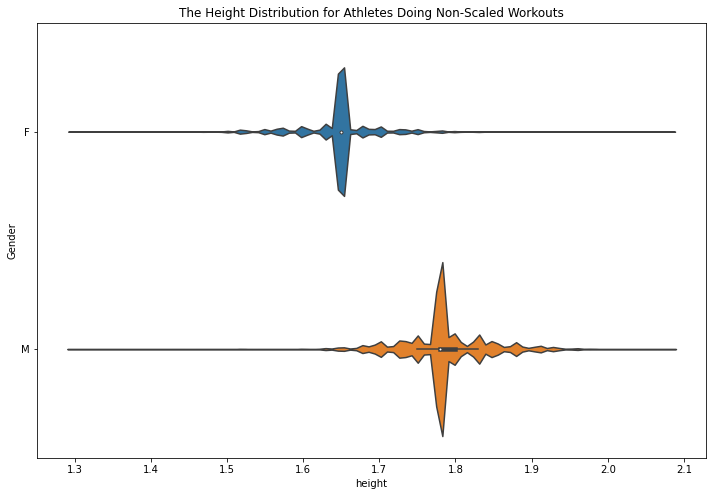

In [72]:
# height - non-scaled

col_val_counts = df_2020_opens_athletes[df_2020_opens_athletes['is_scaled'] == 0]['height'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='height', data=df_2020_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Height Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 



Let's look at the distribution of age across all the divisions. The age distribution seems to be similar between the genders.

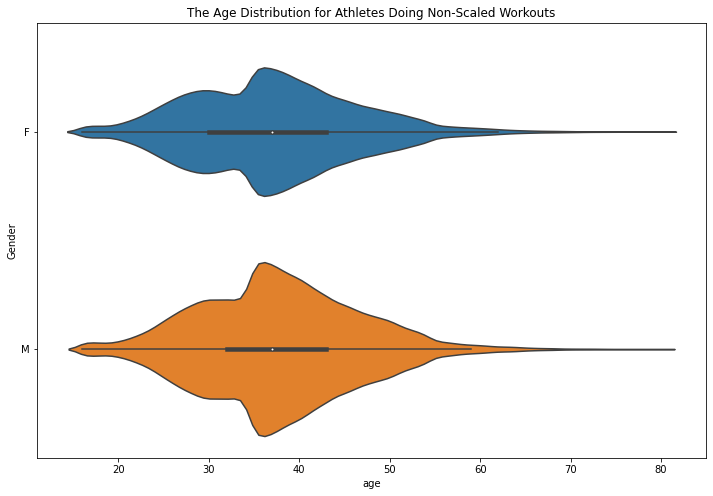

In [73]:
# age

col_val_counts = df_2020_opens_athletes[df_2020_opens_athletes['is_scaled']==0]['age'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='age', data=df_2020_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Age Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 

Let's look at the weight distribution across the genders - it seems that the median for women is around 65 kg and for men - 85 kg (across all the divisions).

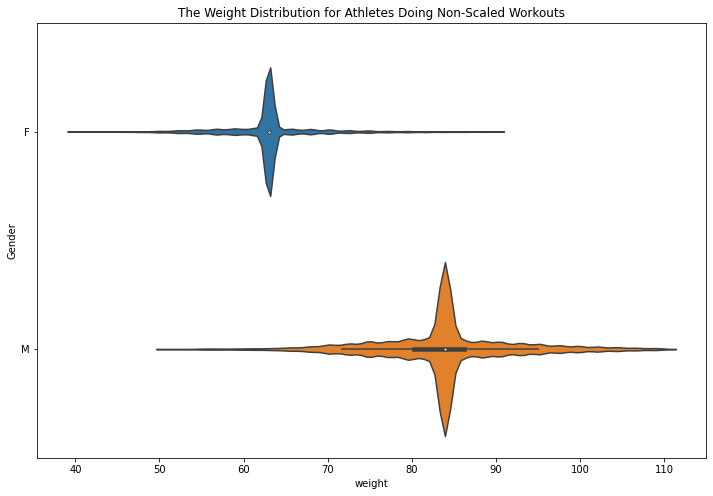

In [74]:
# weight

col_val_counts = df_2020_opens_athletes[df_2020_opens_athletes['is_scaled']==0]['weight'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='weight', data=df_2020_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Weight Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 

Let's do a final check for the nan values - none remains.

In [75]:
print(nan_checker(df_2020_opens_athletes))

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


Take a final look at the data set and save it.

In [76]:
opens_2020_athletes_ready = df_2020_opens_athletes 

In [77]:
opens_2020_athletes_ready

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,9184,Janet Black,Janet,Black,not accepted,F,2886e-P9184_12-184.jpg,United States,4,16766,CrossFit Trison,46,1.63,66.680000,1,29,0,Women (45-49)
1,12348,Karen McCadam,Karen,McCadam,not accepted,F,74335-P12348_6-184.jpg,United States,4,17779,CrossFit Viento,45,1.68,66.680000,2,33,0,Women (45-49)
2,288661,Christine Tensley,Christine,Tensley,not accepted,F,cb7b3-P288661_1-184.jpg,United States,4,1483,Flower City CrossFit,45,1.65,64.410000,3,48,0,Women (45-49)
3,37629,Heather Wood,Heather,Wood,not accepted,F,7b3f4-P37629_3-184.jpg,Canada,4,3240,CrossFit Quispamsis,45,1.57,57.610000,4,50,0,Women (45-49)
4,50423,Jennifer Dieter,Jennifer,Dieter,not accepted,F,5ceb5-P50423_10-184.jpg,United States,4,9506,Crucible CrossFit,46,1.57,61.230000,5,53,0,Women (45-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393530,1655776,Jeff Russell,Jeff,Russell,not accepted,M,pukie.png,United States,3,3732,CrossFit Addison,49,1.78,83.910000,1792,7272,1,Men (45-49)
393531,341314,Manfred Zotter,Manfred,Zotter,not accepted,M,pukie.png,Austria,3,11092,CrossFit Medis,46,1.78,83.910000,1794,7281,1,Men (45-49)
393532,231193,Jeffery Jackson,Jeffery,Jackson,not accepted,M,4f5f8-P231193_1-184.jpg,United States,3,4638,Ft. Wright CrossFit,46,1.83,59.665492,1795,7282,1,Men (45-49)
393533,594055,Hector Garza,Hector,Garza,not accepted,M,51d43-P594055_1-184.jpg,United States,3,9557,King William District CrossFit,48,1.52,65.838879,1796,7285,1,Men (45-49)


In [78]:
#opens_2020_athletes_ready.to_csv('opens_2020_athletes_final.csv', index=False)